In [1]:
import datetime as dt
import matplotlib.pyplot as plt

import pysat
import pysatSpaceWeather

In [2]:
# Set a directory for pysat to use for data
pysat.params['data_dirs'] = '~/pysatDemo'

In [3]:
# Register instruments with pysat. Only needed once per install.
pysat.utils.registry.register_by_module(pysatSpaceWeather.instruments)

In [4]:
# Instantiate a pysat Instrument that will use support in 
# pysatSpaceWeather for ACE Space Weather data.
ace = pysat.Instrument('ace', 'swepam', tag='historic')

In [5]:
# Download data for July, 2021
ace.download(dt.datetime(2021, 7, 1), dt.datetime(2021, 7, 31))

In [6]:
# Load all data
ace.load()

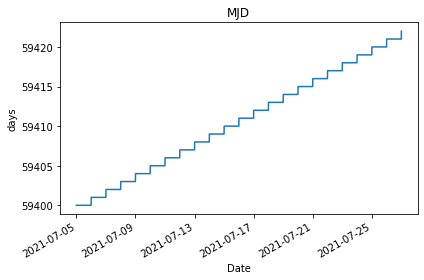

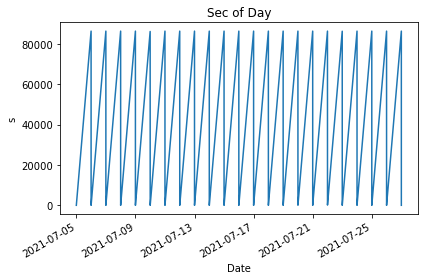

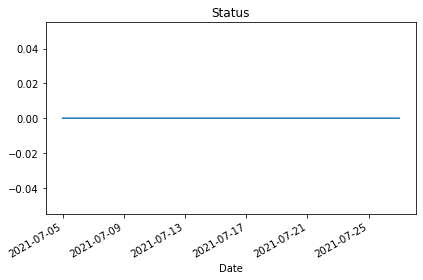

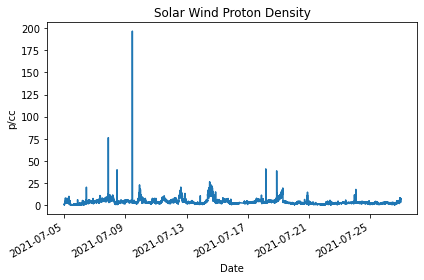

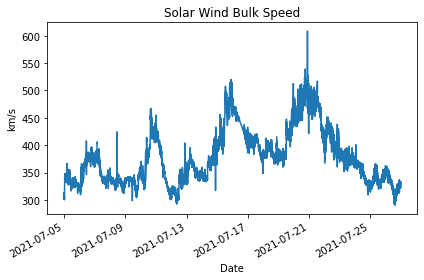

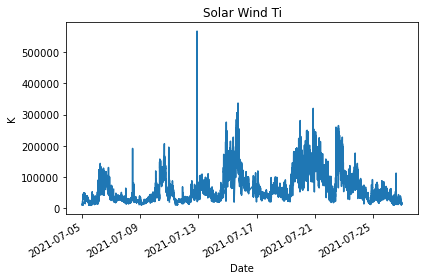

In [8]:
# Make plot of all variables in July, 2021
sdate = dt.datetime(2021, 7, 5)
edate = dt.datetime(2021, 7, 27)
for var in ace.variables:
    plt.figure()
    units = ace.meta[var, ace.meta.labels.units]
    title = ace.meta[var, ace.meta.labels.name]

    ace[sdate:edate, var].plot(title=title, ylabel=units, 
                               xlabel='Date')
    plt.tight_layout()
    plt.savefig(''.join([var, '_example.jpg']))
